# About Dataset
link https://www.kaggle.com/datasets/peimandaii/epilepsy-diagnosis-dataset


The Bonn Dataset is one of the most famous and widely used datasets in the field of brain signal processing (EEG), which is specifically used for the diagnosis and prediction of epilepsy.

This dataset was published by the University of Bonn, Germany, under the supervision of Dr. Ralph Andrzejak in 2001 and is known as a standard benchmark for testing machine learning and deep learning algorithms.

## Imports

In [1]:
import kagglehub
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Load The Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("peimandaii/epilepsy-diagnosis-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'epilepsy-diagnosis-dataset' dataset.
Path to dataset files: /kaggle/input/epilepsy-diagnosis-dataset


In [3]:
print(os.listdir(path))

['EEG_Signal.csv']


In [4]:
df = pd.read_csv(os.path.join(path,'EEG_Signal.csv'))

## Explore The Data

In [5]:
df.head()

,Signal,Labels,id person
0,40.0,A,Z092
1,48.0,A,Z092
2,35.0,A,Z092
3,5.0,A,Z092
4,-40.0,A,Z092


In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(1814399)

In [8]:
df.shape

(2048500, 3)

In [9]:
df = df.sample(n=10000, random_state=42)

In [10]:
df.shape

(10000, 3)

In [31]:
df['Labels'].value_counts()

,count
Labels,
3,2039
2,2016
1,1995
0,1982
4,1968


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1302757 to 1580332
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Signal     10000 non-null  float64
 1   Labels     10000 non-null  object 
 2   id person  10000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 312.5+ KB


In [13]:
df = df.drop('id person',axis=1)

In [14]:
le = LabelEncoder()
df['Labels'] = le.fit_transform(df['Labels'])

## Train Test Split

In [15]:
X = df.drop('Labels',axis=1)
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

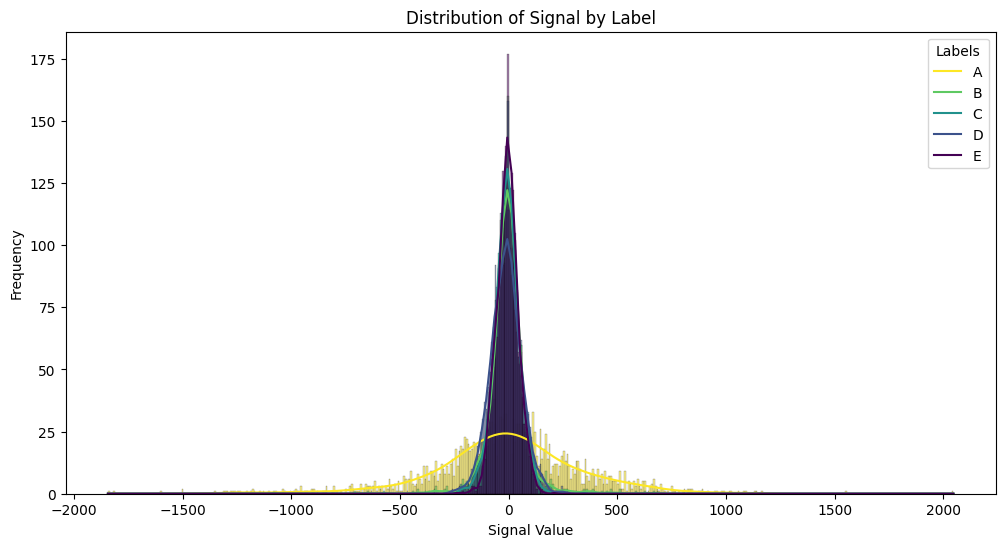

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Signal', hue='Labels', kde=True, palette='viridis')
plt.title('Distribution of Signal by Label')
plt.xlabel('Signal Value')
plt.ylabel('Frequency')
plt.legend(title='Labels', labels=le.inverse_transform(sorted(df['Labels'].unique())))
plt.show()

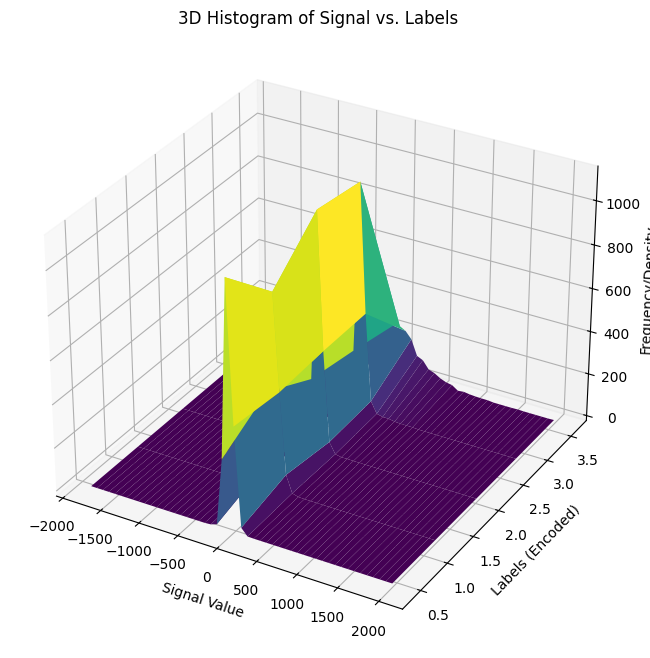

In [17]:
# Prepare data for 3D histogram
x = df['Signal'].values
y = df['Labels'].values

# Create 2D histogram to get frequencies for (Signal, Label) bins
# Using 50 bins for Signal and number of unique labels for Labels
hist, xedges, yedges = np.histogram2d(x, y, bins=(50, len(df['Labels'].unique())))

# Prepare data for plotting the surface
# X and Y represent the center of the bins
X, Y = np.meshgrid((xedges[:-1] + xedges[1:]) / 2, (yedges[:-1] + yedges[1:]) / 2)
Z = hist.T  # Transpose the histogram for correct orientation

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Signal Value')
ax.set_ylabel('Labels (Encoded)')
ax.set_zlabel('Frequency/Density')
ax.set_title('3D Histogram of Signal vs. Labels')

plt.show()

## Trying With Basic Models

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate SVC with a random_state for reproducibility
svc_model = SVC(random_state=42)

# Fit the model to the training data
svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc_model.predict(X_test)

# Calculate and print the accuracy score
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Support Vector Machine Accuracy: {accuracy_svc:.4f}")

# Generate and print the classification report
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svc, target_names=le.inverse_transform(sorted(df['Labels'].unique()))))

# Generate and print the confusion matrix
print("\nSupport Vector Machine Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

Support Vector Machine Accuracy: 0.3310

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           A       0.26      0.83      0.39       402
           B       0.26      0.23      0.24       403
           C       0.21      0.01      0.02       423
           D       0.18      0.01      0.01       394
           E       0.78      0.60      0.68       378

    accuracy                           0.33      2000
   macro avg       0.34      0.34      0.27      2000
weighted avg       0.33      0.33      0.26      2000


Support Vector Machine Confusion Matrix:
[[335  58   2   4   3]
 [276  94   8   4  21]
 [332  68   4   4  15]
 [289  74   4   3  24]
 [ 76  73   1   2 226]]


In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate XGBClassifier with a random_state for reproducibility
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate and print the accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Generate and print the classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=le.inverse_transform(sorted(df['Labels'].unique()))))

# Generate and print the confusion matrix
print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:08:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.3240

XGBoost Classification Report:
              precision    recall  f1-score   support

           A       0.25      0.32      0.28       402
           B       0.24      0.24      0.24       403
           C       0.28      0.28      0.28       423
           D       0.21      0.18      0.19       394
           E       0.74      0.62      0.67       378

    accuracy                           0.32      2000
   macro avg       0.34      0.33      0.33      2000
weighted avg       0.34      0.32      0.33      2000


XGBoost Confusion Matrix:
[[130  69 110  85   8]
 [113  95  87  78  30]
 [128  80 117  80  18]
 [125  92  78  71  28]
 [ 33  58  25  27 235]]


In [20]:
!pip install catboost
import catboost as cb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate CatBoostClassifier with a random_state for reproducibility
# Set verbose to 0 to suppress training output for cleaner execution, or set a higher value for more details
cb_model = cb.CatBoostClassifier(random_state=42, verbose=0, iterations=100) # Added iterations for faster execution, adjust as needed

# Fit the model to the training data
cb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_cb = cb_model.predict(X_test)

# CatBoost returns predictions as a 2D array, convert to 1D if necessary
y_pred_cb = y_pred_cb.flatten()

# Calculate and print the accuracy score
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(f"CatBoost Accuracy: {accuracy_cb:.4f}")

# Generate and print the classification report
print("\nCatBoost Classification Report:")
print(classification_report(y_test, y_pred_cb, target_names=le.inverse_transform(sorted(df['Labels'].unique()))))

# Generate and print the confusion matrix
print("\nCatBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cb))

CatBoost Accuracy: 0.3205

CatBoost Classification Report:
              precision    recall  f1-score   support

           A       0.25      0.35      0.29       402
           B       0.24      0.20      0.22       403
           C       0.26      0.25      0.25       423
           D       0.20      0.18      0.19       394
           E       0.69      0.65      0.67       378

    accuracy                           0.32      2000
   macro avg       0.33      0.32      0.32      2000
weighted avg       0.32      0.32      0.32      2000


CatBoost Confusion Matrix:
[[140  62 103  90   7]
 [119  81  84  80  39]
 [138  66 104  90  25]
 [130  77  77  71  39]
 [ 34  45  33  21 245]]


In [35]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===== Train =====
history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=2)

# ===== Evaluate =====
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc:.4f}")

# predictions
y_pred = model.predict(X_test, batch_size=1024).argmax(axis=1)

print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Epoch 1/50
63/63 - 6s - 103ms/step - accuracy: 0.2665 - loss: 1.5115
Epoch 2/50
63/63 - 0s - 3ms/step - accuracy: 0.3175 - loss: 1.4559
Epoch 3/50
63/63 - 0s - 2ms/step - accuracy: 0.3214 - loss: 1.4311
Epoch 4/50
63/63 - 0s - 3ms/step - accuracy: 0.3276 - loss: 1.4254
Epoch 5/50
63/63 - 0s - 3ms/step - accuracy: 0.3288 - loss: 1.4248
Epoch 6/50
63/63 - 0s - 3ms/step - accuracy: 0.3290 - loss: 1.4224
Epoch 7/50
63/63 - 0s - 3ms/step - accuracy: 0.3369 - loss: 1.4178
Epoch 8/50
63/63 - 0s - 3ms/step - accuracy: 0.3294 - loss: 1.4222
Epoch 9/50
63/63 - 0s - 3ms/step - accuracy: 0.3356 - loss: 1.4173
Epoch 10/50
63/63 - 0s - 3ms/step - accuracy: 0.3282 - loss: 1.4210
Epoch 11/50
63/63 - 0s - 3ms/step - accuracy: 0.3309 - loss: 1.4199
Epoch 12/50
63/63 - 0s - 3ms/step - accuracy: 0.3286 - loss: 1.4184
Epoch 13/50
63/63 - 0s - 3ms/step - accuracy: 0.3379 - loss: 1.4171
Epoch 14/50
63/63 - 0s - 3ms/step - accuracy: 0.3350 - loss: 1.4167
Epoch 15/50
63/63 - 0s - 3ms/step - accuracy: 0.3279 - 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##  Final Conclusion

After testing multiple models — including **Support Vector Machine**, **XGBoost**, **CatBoost**,  
and a **Neural Network**, the overall accuracy has consistently remained around **30–35%**.

###  Key Observations
- Classes **0** and **4** are predicted most of the time.  
- Classes **2** and **3** are almost never recognized.  
- **Recall** and **F1-scores** for those classes are near **zero**.  
- Even though the dataset is **balanced**, the feature(s) — mainly **Signal** — do not
  provide enough information to clearly separate the classes.

###  Conclusion
The current dataset is **not sufficiently informative** for multi-class classification.  
The features do not contain enough discriminative patterns to allow the models to learn
clear decision boundaries between classes.

###  Recommended Next Steps
1. **Collect or engineer more informative features**  
   (e.g., derived signal stats, time-based features, or additional sensors).
2. **Apply person-aware normalization** or add contextual features if each person’s signal varies.
3. **Perform feature analysis** (correlation, PCA, or mutual information) to understand what contributes to each label.
4. **Consider merging or redefining classes** if some are not meaningfully separable.

Until richer or more descriptive data is provided,  
further model tuning will not yield significant performance improvements.
